In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import pandas as pd
import numpy as np
import argparse
import seaborn as sns

In [2]:
def get_rmsd(rmsd_file: str) -> tuple:
    """
    read in an xvg-formatted file and ouput lists of time, rmsd
    """
    reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
    time = [step.data[0] for step in reader]
    rmsd = [step.data[1] for step in reader]
    return time, rmsd


def get_bond_lengths(distance_file: str) -> tuple:
    """
    get bond lengths between zinc and its coordinating atoms
    """    
    reader = mda.auxiliary.XVG.XVGReader(distance_file)
    time = [step.data[0] for step in reader]
    get_distance = lambda index: [step.data[index] for step in reader]
    distance_1 = get_distance(1)
    distance_2 = get_distance(2)
    distance_3 = get_distance(3)
    distance_4 = get_distance(4)
    return time, distance_1, distance_2, distance_3, distance_4


def get_running_average(time: list, quantity: list, window=100) -> np.array:
    """
    calculate the running average over a window of N ps
    """
    dataframe = pd.DataFrame({"time": time, "distance": quantity})
    return dataframe["distance"].rolling(window=window).mean().to_numpy()


def get_equilibration(file: str) -> tuple:
    """
    open xvg-formatted file and return tuple of time and equilibration quantity
    """
    reader = mda.auxiliary.XVG.XVGReader(file)
    time = [step.data[0] for step in reader]
    quantity = [step.data[1] for step in reader]
    return time, quantity


# VIM-2 and L8J modelled with 4n2
~

In [3]:
distance_file = "/home/jguven/projects/metalloenzymes/nonbonded_model_vim2/step_4n2/harmonic_restraints_md/dist_md.txt"
data = pd.read_csv(distance_file, header=0, sep="\s+")
time = data["t"].to_numpy() * (0.002/1000)

get_distance = lambda column: data[column].to_numpy()

zn1_h1, zn1_h2, zn1_h3, zn1_wat = get_distance("h1"), get_distance("h2"), get_distance("h3"), get_distance("w")

zn2_d, zn2_c, zn2_h, zn2_lig = get_distance("d"), get_distance("c"), get_distance("h"), get_distance("o")


## ZN1

### ZN1 - HID 84

HISTIDINE HID 84 
2.2595673979999997 +/- 0.047741450927989156


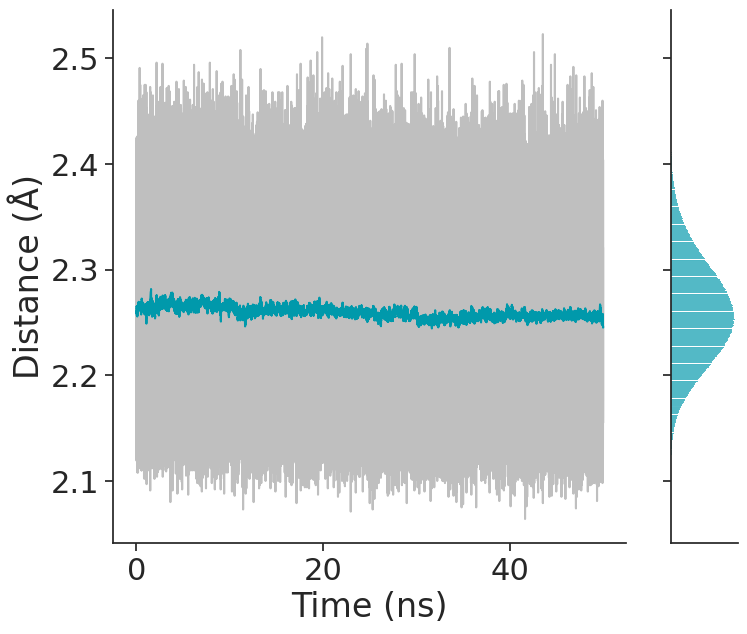

In [4]:
print("HISTIDINE HID 84 ")
h1_avg = np.mean(zn1_h1)
h1_std = np.std(zn1_h1)
runnning_avg_h1 = get_running_average(time, zn1_h1, window=1000)
print(f"{h1_avg} +/- {h1_std}")
data1 = np.array([time, zn1_h1])
data1_tr = np.transpose(data1)
df1 = pd.DataFrame(data1_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df1, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df1["time"], df1["ligand"], s=0)
plot.ax_joint.plot(df1["time"], df1["ligand"], color="gray", alpha=0.5)
plt.plot(time, runnning_avg_h1, color="#0099AB")
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn1_hid84.pdf")

### ZN1 - HIE 86

In [5]:
print("HISTIDINE HIE 86 ")
h2_avg = np.mean(zn1_h2)
h2_std = np.std(zn1_h2)
runnning_avg_h2 = get_running_average(time, zn1_h2, window=1000)
print(f"{h2_avg} +/- {h2_std}")
data2 = np.array([time, zn1_h2])
data2_tr = np.transpose(data2)
df2 = pd.DataFrame(data2_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df2, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df2["time"], df2["ligand"], s=0)
plot.ax_joint.plot(df2["time"], df2["ligand"], color="gray", alpha=0.5)
plt.plot(time, runnning_avg_h2, color="#0099AB")
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn1_hie86.pdf")

HISTIDINE HIE 86 
2.1503007607999995 +/- 0.03720504212793186


### ZN1 - HID 149

HISTIDINE HID 149 
2.193178923999999 +/- 0.0413546531046051


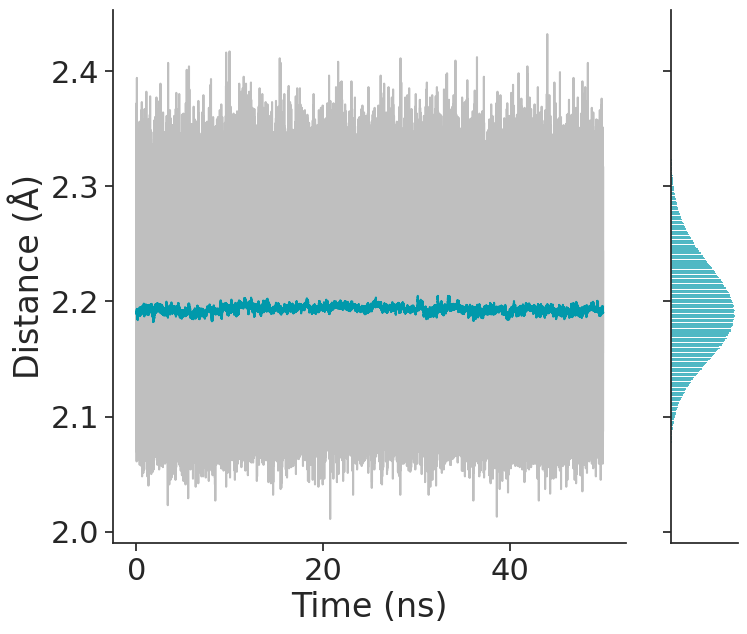

In [ ]:
print("HISTIDINE HID 149 ")
h3_avg = np.mean(zn1_h3)
h3_std = np.std(zn1_h3)
runnning_avg_h3 = get_running_average(time, zn1_h3, window=1000)
print(f"{h3_avg} +/- {h3_std}")
data3 = np.array([time, zn1_h3])
data3_tr = np.transpose(data3)
df3 = pd.DataFrame(data3_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df3, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()                                                                                                                             
plt.sca(plot.ax_joint)
plt.scatter(df3["time"], df3["ligand"], s=0)
plot.ax_joint.plot(df3["time"], df3["ligand"], color="gray", alpha=0.5)
plt.plot(time, runnning_avg_h3, color="#0099AB")
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn1_hid149.pdf")

### ZN1 - WAT 

XTAL WATER
2.1371974707999977 +/- 0.041354498832450466


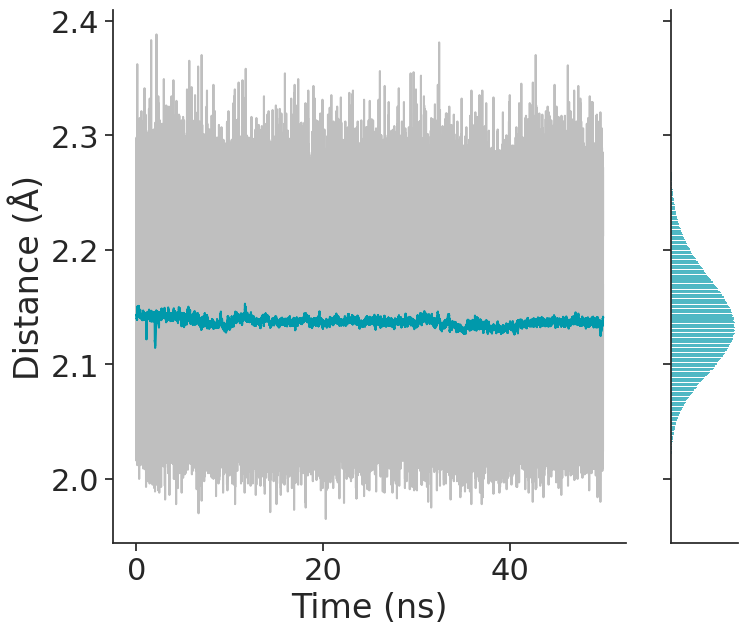

In [ ]:
print("XTAL WATER")
wat_avg = np.mean(zn1_wat)
wat_std = np.std(zn1_wat)
running_avg_wat = get_running_average(time, zn1_wat, window=1000)
print(f"{wat_avg} +/- {wat_std}")
data4 = np.array([time, zn1_wat])
data4_tr = np.transpose(data4)
df4 = pd.DataFrame(data4_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df4, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df4["time"], df4["ligand"], s=0)
plot.ax_joint.plot(df4["time"], df4["ligand"], color="gray", alpha=0.5)
plt.plot(time, running_avg_wat, color="#0099AB")
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn1_wat.pdf")

## ZN 2

### ZN2 - ASP 88

ASPARTIC ACID ASP 88 
2.0501277715999993 +/- 0.03741635977508012


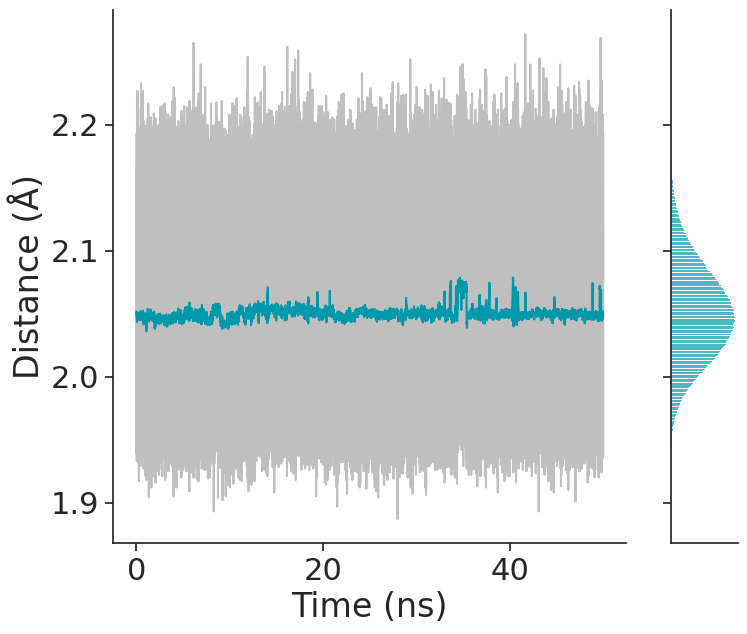

In [ ]:
print("ASPARTIC ACID ASP 88 ")
d_avg = np.mean(zn2_d)
d_std = np.std(zn2_d)
running_avg_d = get_running_average(time, zn2_d, window=1000)
print(f"{d_avg} +/- {d_std}")
data5 = np.array([time, zn2_d])
data5_tr = np.transpose(data5)
df5 = pd.DataFrame(data5_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df5, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df5["time"], df5["ligand"], s=0)
plot.ax_joint.plot(df5["time"], df5["ligand"], color="gray", alpha=0.5)
plt.plot(time, running_avg_d, color="#0099AB")
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn2_asp88.pdf")

### ZN2 - CYS 168

CYSTEINE 168
2.3787891919999997 +/- 0.0441727459412151


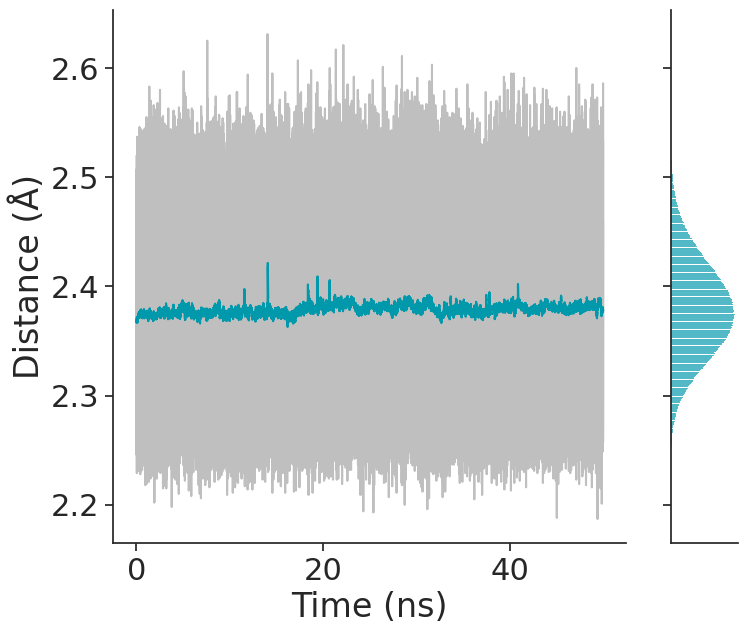

In [13]:
print("CYSTEINE 168")
c_avg = np.mean(zn2_c)
c_std = np.std(zn2_c)
running_avg_c = get_running_average(time, zn2_c, window=1000)
print(f"{c_avg} +/- {c_std}")
data6 = np.array([time, zn2_c])
data6_tr = np.transpose(data6)
df6 = pd.DataFrame(data6_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df6, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df6["time"], df6["ligand"], s=0)
plot.ax_joint.plot(df6["time"], df6["ligand"], color="gray", alpha=0.5)
plt.plot(time, running_avg_c, color="#0099AB")
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn2_cys168.pdf")

### ZN2 - HID 210

HISTIDINE 210
2.4044473748 +/- 0.06524593570321699


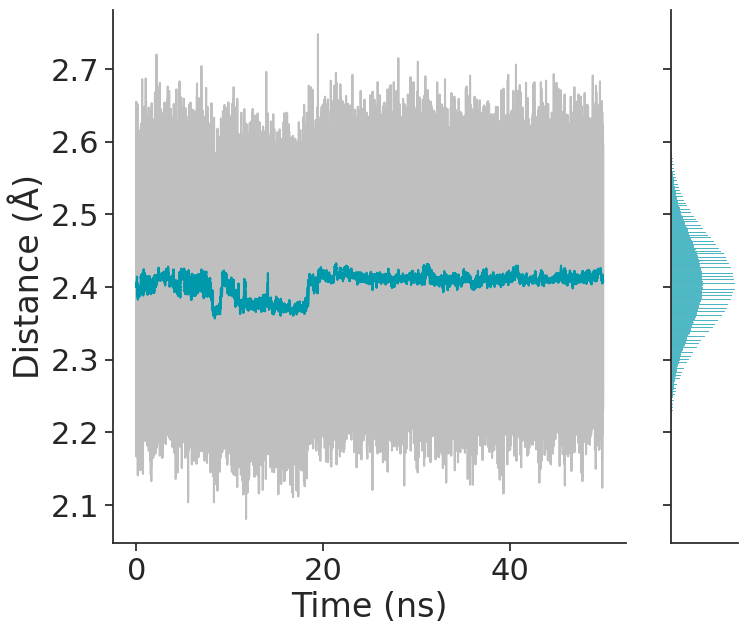

In [14]:
print("HISTIDINE 210")
h_avg = np.mean(zn2_h)
h_std = np.std(zn2_h)
running_avg_h = get_running_average(time, zn2_h, window=1000)
print(f"{h_avg} +/- {h_std}")
data7 = np.array([time, zn2_h])
data7_tr = np.transpose(data7)
df7 = pd.DataFrame(data7_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df7, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df7["time"], df7["ligand"], s=0)
plot.ax_joint.plot(df7["time"], df7["ligand"], color="gray", alpha=0.5)
plt.plot(time, running_avg_h, color="#0099AB")
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn2_hid210.pdf")

### ZN2 - L8J 

LIGAND
2.1610849815999984 +/- 0.045494941131159414


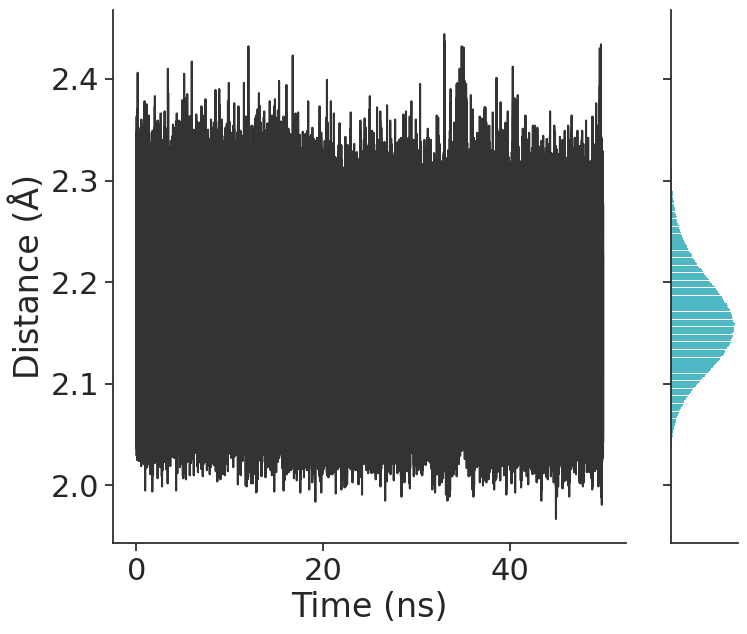

In [33]:
print("LIGAND")
lig_avg = np.mean(zn2_lig)
lig_std = np.std(zn2_lig)
running_avg_lig = 
print(f"{lig_avg} +/- {lig_std}")
data8 = np.array([time, zn2_lig])
data8_tr = np.transpose(data8)
df8 = pd.DataFrame(data8_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df8, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df8["time"], df8["ligand"], s=0)
plot.ax_joint.plot(df8["time"], df8["ligand"], color="black", alpha=0.8)
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ns)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("step_4n2/harmonic_restraints_md/zn2_lig.pdf")

# Ligand 1 bonded vs non-bonded


In [40]:
from matplotlib.font_manager import get_font_names
names = sorted(get_font_names())
for name in names:
    print(name)

Abyssinica SIL
Ani
AnjaliOldLipi
C059
Chandas
Chilanka
D050000L
DejaVu Math TeX Gyre
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Dhurjati
Droid Sans Fallback
Dyuthi
FreeMono
FreeSans
FreeSerif
Gargi
Garuda
Gayathri
Gidugu
Gubbi
Gurajada
Inconsolata
Jamrul
KacstArt
KacstBook
KacstDecorative
KacstDigital
KacstFarsi
KacstLetter
KacstNaskh
KacstOffice
KacstOne
KacstPen
KacstPoster
KacstQurn
KacstScreen
KacstTitle
KacstTitleL
Kalapi
Kalimati
Karumbi
Keraleeyam
Khmer OS
Khmer OS System
Kinnari
LKLUG
LakkiReddy
Laksaman
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
Likhan
Lohit Assamese
Lohit Bengali
Lohit Devanagari
Lohit Gujarati
Lohit Gurmukhi
Lohit Kannada
Lohit Malayalam
Lohit Odia
Lohit Tamil
Lohit Tamil Classical
Lohit Telugu
Loma
Mallanna
Mandali
Manjari
Meera
Mitra 
Mukti
NATS
NTR
Nakula
Navilu
Nimbus Mono PS
Nimbus Roman
Nimbus Sans
Nimbus Sans Narrow
Norasi
Noto Mono
Noto Sans CJK JP
Noto Sans Mono
Noto Serif CJK JP
O

HISTIDINE HID1 
HISTIDINE HIE 
HISTIDINE HID2 
LIGAND


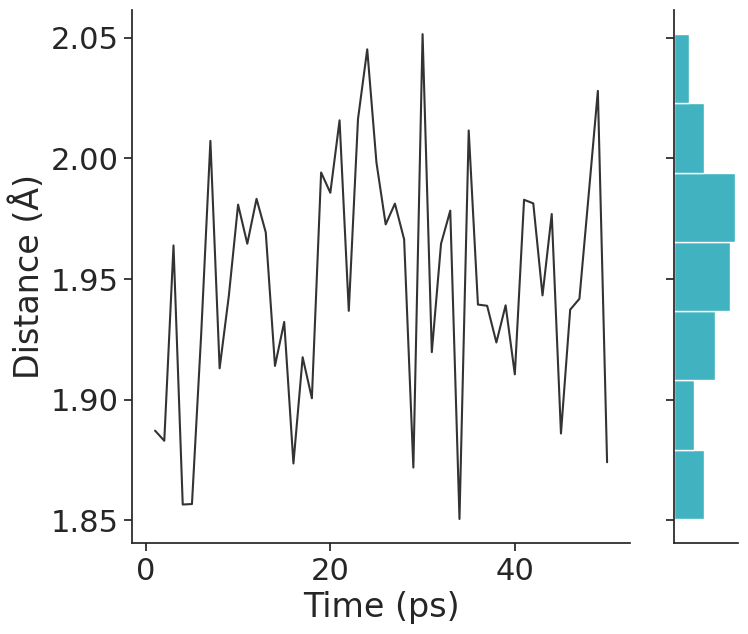

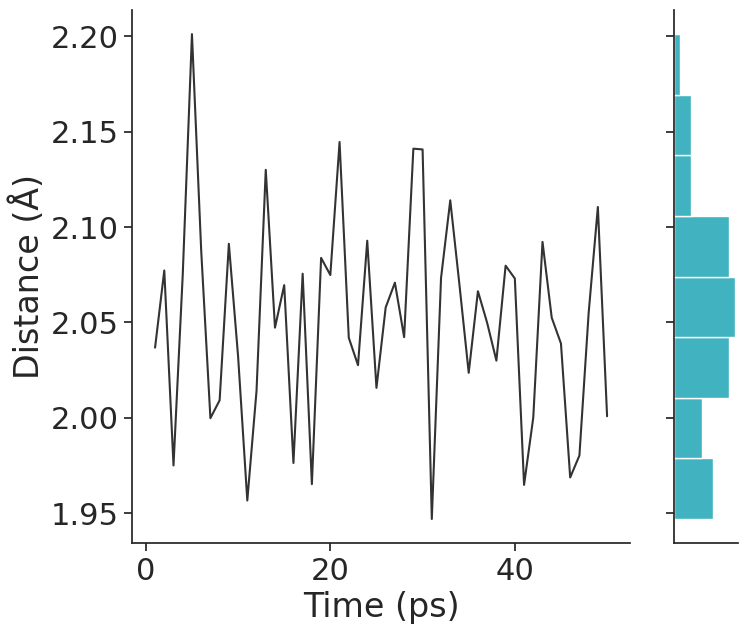

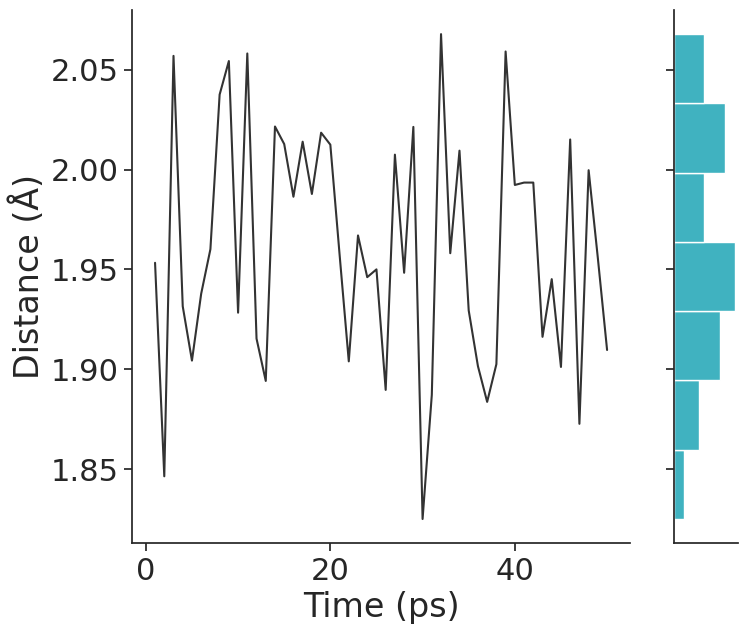

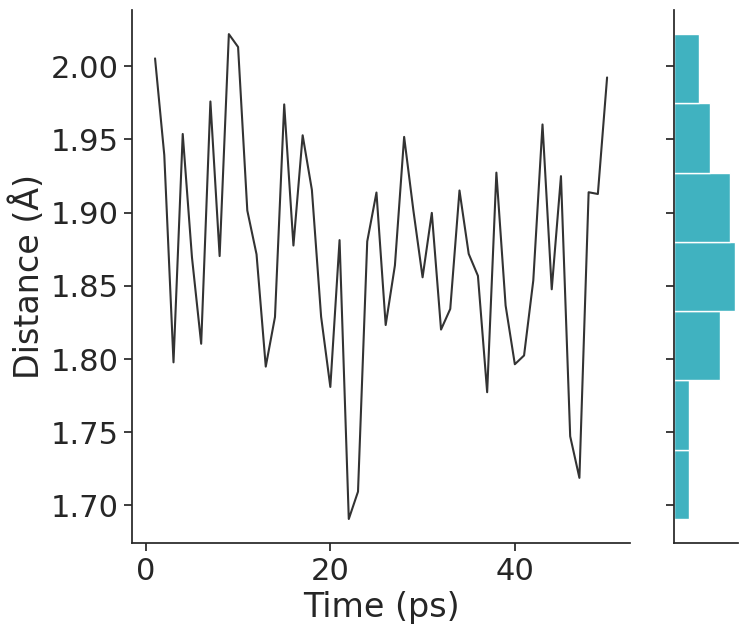

In [27]:
import seaborn as sns
import matplotlib
matplotlib.rcParams["font.family"] = "Helvetica Neue"

# nonbonded

zn_1_file_nb = "dis_zn1.dat"
zn_2_file_nb = "dis_zn2.dat"

time1_nb, hd1_nb, he1_nb, hd2_nb, pt11_nb = get_bond_lengths(zn_1_file_nb)
time2_nb, ap1_nb, cs1_nb, hd3_nb, pt12_nb = get_bond_lengths(zn_2_file_nb)

hd1_avg_nb = get_running_average(time1_nb, hd1_nb)
he1_avg_nb = get_running_average(time1_nb, he1_nb)
hd2_avg_nb = get_running_average(time1_nb, hd2_nb)
pt11_avg_nb = get_running_average(time1_nb, pt11_nb)

print("HISTIDINE HID1 ")

data1 = np.array([time1_nb, hd1_nb])
data1_tr = np.transpose(data1)
df1 = pd.DataFrame(data1_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df1, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df1["time"], df1["ligand"], s=0)
plot.ax_joint.plot(df1["time"], df1["ligand"], color="black", alpha=0.8)
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ps)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("zn1_hid1.pdf")

print("HISTIDINE HIE ")

data2 = np.array([time1_nb, he1_nb])
data2_tr = np.transpose(data2)
df2 = pd.DataFrame(data2_tr, columns=["time", "ligand"])
df2 = pd.DataFrame(data2_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df2, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df2["time"], df2["ligand"], s=0)
plot.ax_joint.plot(df2["time"], df2["ligand"], color="black", alpha=0.8)
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ps)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("zn1_hie.pdf")


print("HISTIDINE HID2 ")
data3 = np.array([time1_nb, hd2_nb])
data3_tr = np.transpose(data3)
df3 = pd.DataFrame(data3_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df3, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df3["time"], df3["ligand"], s=0)
plot.ax_joint.plot(df3["time"], df3["ligand"], color="black", alpha=0.8)
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ps)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("zn1_hid2.pdf")


print("LIGAND")
data4 = np.array([time1_nb, pt11_nb])
data4_tr = np.transpose(data4)
df4 = pd.DataFrame(data4_tr, columns=["time", "ligand"])
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plot = sns.jointplot(data=df4, x="time", y="ligand", kind="scatter", color="#0099AB",)
plot.ax_joint.cla()
plt.sca(plot.ax_joint)
plt.scatter(df4["time"], df4["ligand"], s=0)
plot.ax_joint.plot(df4["time"], df4["ligand"], color="black", alpha=0.8)
plt.setp(plot.ax_marg_x.patches, color="w")
plot.ax_marg_x.remove() 
plot.ax_joint.spines["top"].set_visible(True)
plt.gcf().set_size_inches(8, 8)
plot.set_axis_labels("Time (ps)", "Distance (Å)")
sns.despine()
plt.tight_layout()
plt.savefig("zn1_lig.pdf")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


HD1: 1.9 ± 0.0 Å ref: 2.03 Å
HE1: 2.1 ± 0.1 Å ref: 2.03 Å
HD2: 2.0 ± 0.1 Å ref: 2.03 Å
PT1 ZN1: 1.9 ± 0.1 Å


<Figure size 800x800 with 0 Axes>

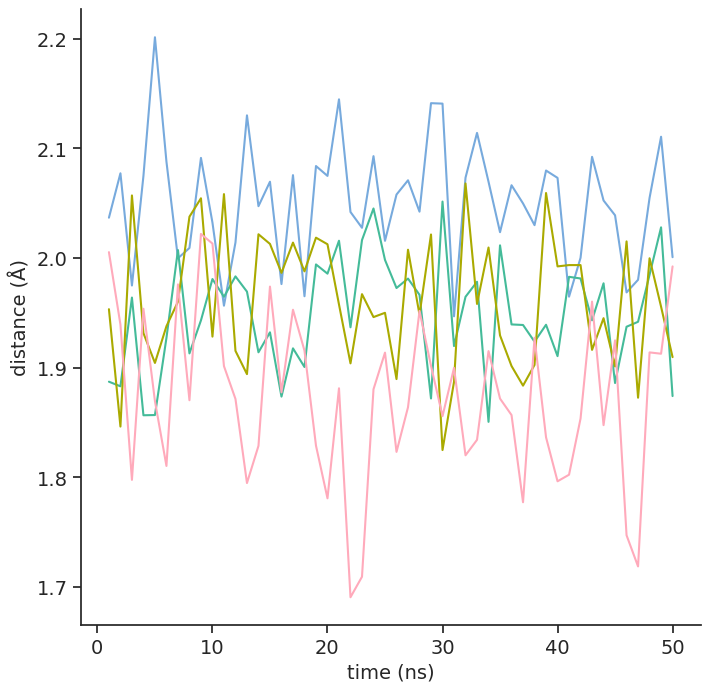

In [15]:

plt.figure(figsize=(8,8))
# sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)

# plot = sns.jointplot(data=dataframe, x="time", y="ligand", kind="scatter", color="#0099AB",)
# plot.ax_joint.cla()
# plt.sca(plot.ax_joint)
# plt.scatter(dataframe["time"], dataframe["ligand"], s=0)
# plot.ax_joint.plot(dataframe["time"], dataframe["ligand"], color="black", alpha=0.8)
# # plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# # plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

# plt.gcf().set_size_inches(8, 8)
# plot.set_axis_labels("Time (ps)", "Distance (Å)")
# plt.setp(plot.ax_marg_x.patches, color="w")
# # plt.setp(plot.ax_marg_x.spines, color="w")
# plot.ax_marg_x.remove() 
# plot.ax_joint.spines["top"].set_visible(True)
# sns.despine()
# plt.tight_layout()
# plt.savefig("../../plots/water_mediated_hydrogen_bonds/ligand_9_tr.png", transparent=True)





plt.figure(figsize=(8,8))
sns.set_theme(context="notebook", palette="colorblind", style="ticks", font="DejaVu Sans")
plt.plot(time1_nb, he1_nb, color="#77AADD")
plt.plot(time1_nb, hd1_nb, color="#44BB99")
plt.plot(time1_nb, hd2_nb, color="#AAAA00")
plt.plot(time1_nb, pt11_nb, color="#FFAABB")

# plt.plot(time1_nb, hd1_avg_nb, label="ZN1 - HIS", color="#77AADD")
# plt.plot(time1_nb, he1_avg_nb, label="ZN1 - HIS", color="#44BB99")
# plt.plot(time1_nb, hd2_avg_nb, label="ZN1 - HIS", color="#AAAA00")
# plt.plot(time1_nb, pt11_avg_nb, label="ZN1 - LIG", color="#FFAABB")

plt.xlabel("time (ns)", fontsize=14)
plt.ylabel("distance (Å)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", frameon=False, fontsize=14)
sns.despine()

plt.savefig("/home/jguven/projects/metalloenzymes/plots/zn1_bond_lengths.pdf")
hd1_avg_nb = np.mean(hd1_nb)
he1_avg_nb = np.mean(he1_nb)
hd2_avg_nb = np.mean(hd2_nb)
pt11_avg_nb = np.mean(pt11_nb)
hd1_std_nb = np.std(hd1_nb)
he1_std_nb = np.std(he1_nb)
hd2_std_nb = np.std(hd2_nb)
pt11_std_nb = np.std(pt11_nb)

print(f"HD1: {hd1_avg_nb:.1f} \u00B1 {hd1_std_nb:.1f} \u212B ref: 2.03 \u212B")
print(f"HE1: {he1_avg_nb:.1f} \u00B1 {he1_std_nb:.1f} \u212B ref: 2.03 \u212B")
print(f"HD2: {hd2_avg_nb:.1f} \u00B1 {hd2_std_nb:.1f} \u212B ref: 2.03 \u212B")
print(f"PT1 ZN1: {pt11_avg_nb:.1f} \u00B1 {pt11_std_nb:.1f} \u212B")

# # times, ligand_water_distances, histidine_water_distances1, histidine_water_distances2, arginine_water_distances1, arginine_water_distances2
# raw_data = np.load("../outputs/water_hb_ligand_9_his_arg.npy", allow_pickle=True)
# data = np.array([raw_data[0], raw_data[1]])
# data_transpose = np.transpose(data)

# dataframe = pd.DataFrame(data_transpose, columns=["time", "ligand"])

# avg = np.mean(dataframe["ligand"])
# print(avg)
# med = np.median(dataframe["ligand"])
# print(med)
# std = np.std(dataframe["ligand"])
# print(std)
# sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)

# plot = sns.jointplot(data=dataframe, x="time", y="ligand", kind="scatter", color="#0099AB",)
# plot.ax_joint.cla()
# plt.sca(plot.ax_joint)
# plt.scatter(dataframe["time"], dataframe["ligand"], s=0)
# plot.ax_joint.plot(dataframe["time"], dataframe["ligand"], color="black", alpha=0.8)
# # plot.ax_joint.hlines(avg, 0, 2000, lw=2, color="#D0006F")
# # plot.ax_joint.hlines(med, 0, 2000, lw=2, color="#68246D")

# plt.gcf().set_size_inches(8, 8)
# plot.set_axis_labels("Time (ps)", "Distance (Å)")
# plt.setp(plot.ax_marg_x.patches, color="w")
# # plt.setp(plot.ax_marg_x.spines, color="w")
# plot.ax_marg_x.remove() 
# plot.ax_joint.spines["top"].set_visible(True)
# sns.despine()
# plt.tight_layout()
# plt.savefig("../../plots/water_mediated_hydrogen_bonds/ligand_9_tr.png", transparent=True)

HD1: 2.2 ± 0.0 Å ref: 2.03 Å
HE1: 2.2 ± 0.0 Å ref: 2.03 Å
HD2: 2.2 ± 0.0 Å ref: 2.03 Å
PT1 ZN1: 2.1 ± 0.0 Å
CS1: 2.4 ± 0.1 Å ref: 2.31 Å
AP1: 2.0 ± 0.0 Å ref: 1.99 Å
HD3: 2.1 ± 0.0 Å ref: 2.03 Å
PT1 ZN2: 2.1 ± 0.0 Å 


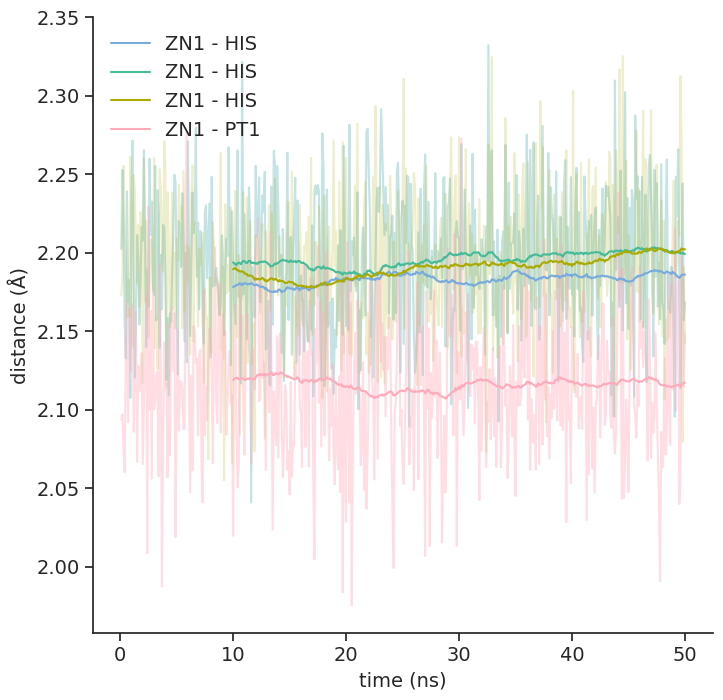

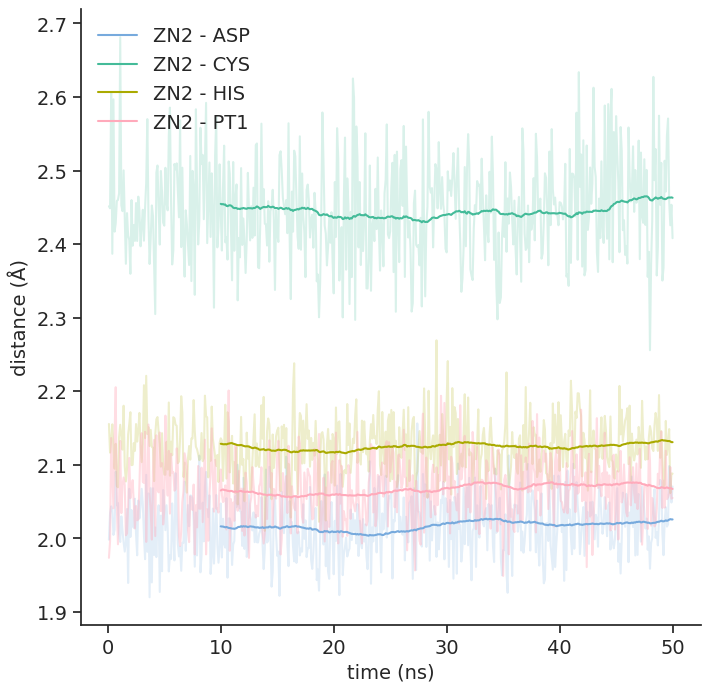

In [43]:


plt.figure(figsize=(8,8))
sns.set_theme(context="notebook", palette="colorblind", style="ticks", font="DejaVu Sans")
plt.plot(time1_nb, ap1_nb, alpha = 0.2, color="#77AADD")
plt.plot(time1_nb, cs1_nb, alpha = 0.2, color="#44BB99")
plt.plot(time1_nb, hd3_nb, alpha = 0.2, color="#AAAA00")
plt.plot(time1_nb, pt12_nb, alpha = 0.4, color="#FFAABB")
ap1_avg_nb = get_running_average(time1_nb, ap1_nb)
cs1_avg_nb = get_running_average(time1_nb, cs1_nb)
hd3_avg_nb = get_running_average(time1_nb, hd3_nb)
pt12_avg_nb = get_running_average(time1_nb, pt12_nb)


plt.plot(time2_nb, ap1_avg_nb, label="ZN2 - ASP", color="#77AADD")
plt.plot(time2_nb, cs1_avg_nb, label="ZN2 - CYS", color="#44BB99")
plt.plot(time2_nb, hd3_avg_nb, label="ZN2 - HIS", color="#AAAA00")
plt.plot(time2_nb, pt12_avg_nb, label="ZN2 - PT1", color="#FFAABB")
plt.legend(loc="upper left", frameon=False, fontsize=14)
plt.xlabel("time (ns)", fontsize=14)
plt.ylabel("distance (Å)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.savefig("/home/jguven/projects/metalloenzymes/plots/zn2_bond_lengths.pdf")



ap1_avg_nb = np.mean(ap1_nb)
cs1_avg_nb = np.mean(cs1_nb)
hd3_avg_nb = np.mean(hd3_nb)
pt12_avg_nb = np.mean(pt12_nb)
ap1_std_nb = np.std(ap1_nb)
cs1_std_nb = np.std(cs1_nb)
hd3_std_nb = np.std(hd3_nb)
pt12_std_nb = np.std(pt12_nb)

print(f"CS1: {cs1_avg_nb:.1f} \u00B1 {cs1_std_nb:.1f} \u212B ref: 2.31 \u212B")
print(f"AP1: {ap1_avg_nb:.1f} \u00B1 {ap1_std_nb:.1f} \u212B ref: 1.99 \u212B")
print(f"HD3: {hd3_avg_nb:.1f} \u00B1 {hd3_std_nb:.1f} \u212B ref: 2.03 \u212B")
print(f"PT1 ZN2: {pt12_avg_nb:.1f} \u00B1 {pt12_std_nb:.1f} \u212B ")

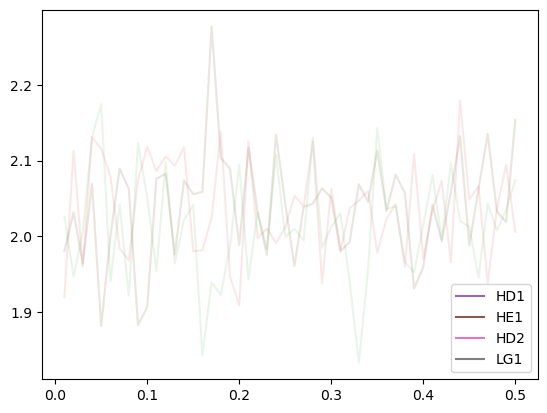

HD1: 2.0 ± 0.0 Å ref: 2.03 Å
HE1: 2.0 ± 0.1 Å ref: 2.03 Å
HD2: 2.0 ± 0.1 Å ref: 2.03 Å
PT1 ZN1: 2.0 ± 0.1 Å
CS1: 2.4 ± 0.1 Å ref: 2.31 Å
AP1: 2.0 ± 0.1 Å ref: 1.99 Å
HD3: 1.9 ± 0.1 Å ref: 2.03 Å
PT1 ZN2: 1.7 ± 0.1 Å 


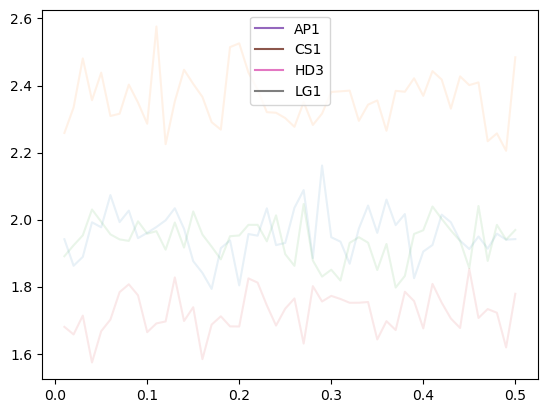

In [5]:
# bonded
path = "/home/jguven/projects/metalloenzymes/dft/ligand_1/amber/analysis/"
zn_1_file = path + "dis_zn1.dat"
zn_2_file = path + "dis_zn2.dat"

time1, hd1, he1, hd2, pt11 = get_bond_lengths(zn_1_file)
time2, ap1, cs1, hd3, pt12 = get_bond_lengths(zn_2_file)

hd1_avg = get_running_average(time1, hd1)
he1_avg = get_running_average(time1, he1)
hd2_avg = get_running_average(time1, hd2)
pt11_avg = get_running_average(time1, pt11)
plt.plot(time1, he1, alpha = 0.1)
plt.plot(time1, he1, alpha = 0.1)
plt.plot(time1, hd2, alpha = 0.1)
plt.plot(time1, pt11, alpha = 0.1)

plt.plot(time1, hd1_avg, label="HD1")
plt.plot(time1, he1_avg, label="HE1")
plt.plot(time1, hd2_avg, label="HD2")
plt.plot(time1, pt11_avg, label="LG1")
plt.legend()
plt.show()
hd1_avg = np.mean(hd1)
he1_avg = np.mean(he1)
hd2_avg = np.mean(hd2)
pt11_avg = np.mean(pt11)
hd1_std = np.std(hd1)
he1_std = np.std(he1)
hd2_std = np.std(hd2)
pt11_std = np.std(pt11)

print(f"HD1: {hd1_avg:.1f} \u00B1 {hd1_std:.1f} \u212B ref: 2.03 \u212B")
print(f"HE1: {he1_avg:.1f} \u00B1 {he1_std:.1f} \u212B ref: 2.03 \u212B")
print(f"HD2: {hd2_avg:.1f} \u00B1 {hd2_std:.1f} \u212B ref: 2.03 \u212B")
print(f"PT1 ZN1: {pt11_avg:.1f} \u00B1 {pt11_std:.1f} \u212B")

plt.plot(time1, ap1, alpha = 0.1)
plt.plot(time1, cs1, alpha = 0.1)
plt.plot(time1, hd3, alpha = 0.1)
plt.plot(time1, pt12, alpha = 0.1)

ap1_avg = get_running_average(time1, ap1)
cs1_avg = get_running_average(time1, cs1)
hd3_avg = get_running_average(time1, hd3)
pt12_avg = get_running_average(time1, pt12)

plt.plot(time2, ap1_avg, label="AP1")
plt.plot(time2, cs1_avg, label="CS1")
plt.plot(time2, hd3_avg, label="HD3")
plt.plot(time2, pt12_avg, label="LG1")
plt.legend()
plt.plot()

ap1_avg = np.mean(ap1)
cs1_avg = np.mean(cs1)
hd3_avg = np.mean(hd3)
pt12_avg = np.mean(pt12)
ap1_std = np.std(ap1)
cs1_std = np.std(cs1)
hd3_std = np.std(hd3)
pt12_std = np.std(pt12)

print(f"CS1: {cs1_avg:.1f} \u00B1 {cs1_std:.1f} \u212B ref: 2.31 \u212B")
print(f"AP1: {ap1_avg:.1f} \u00B1 {ap1_std:.1f} \u212B ref: 1.99 \u212B")
print(f"HD3: {hd3_avg:.1f} \u00B1 {hd3_std:.1f} \u212B ref: 2.03 \u212B")
print(f"PT1 ZN2: {pt12_avg  :.1f} \u00B1 {pt12_std:.1f} \u212B ")

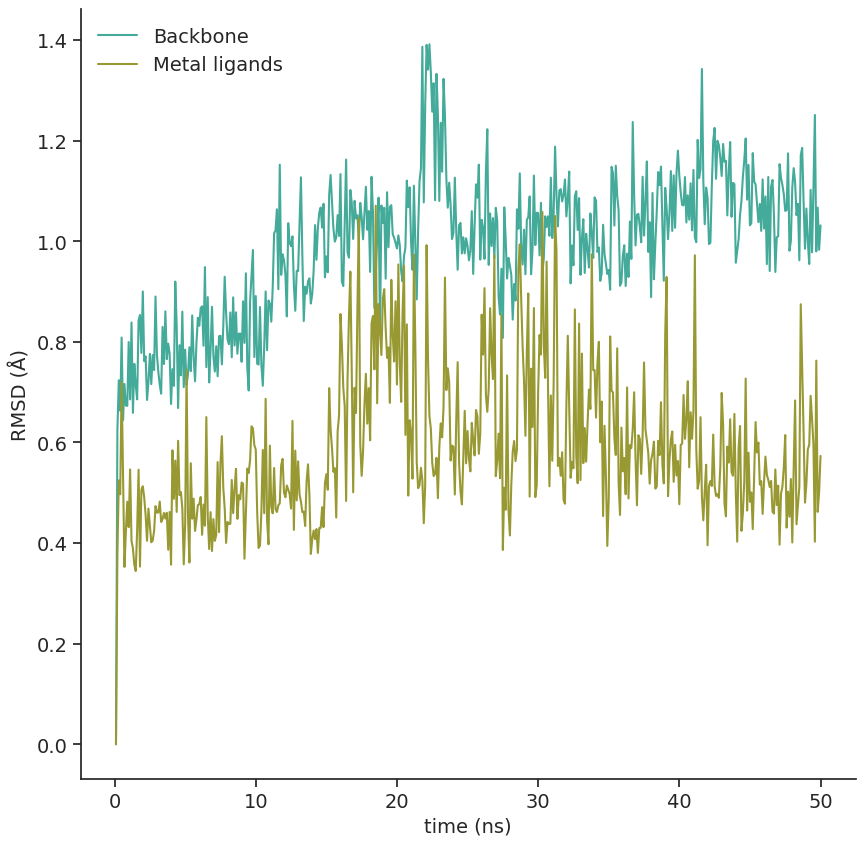

In [47]:
bb_rmsd_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/amber/analysis/protein_bb_rmsd.dat"
metal_rmsd_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/amber/analysis/metal_site_rmsd.dat"

bb_time, bb_rmsd = get_rmsd(bb_rmsd_file)
metal_time, metal_rmsd = get_rmsd(metal_rmsd_file)


fig, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(context="notebook", palette="colorblind", style="ticks", font="DejaVu Sans")
ax.plot(bb_time, bb_rmsd, c="#44AA99", label="Backbone")
ax.plot(metal_time, metal_rmsd, c="#999933", label="Metal ligands")
ax.set_xlabel("time (ns)", fontsize=14)
ax.set_ylabel("RMSD (Å)", fontsize=14)
plt.legend(frameon=False, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.savefig("/home/jguven/projects/metalloenzymes/plots/nonbonded_rmsd.pdf")


In [7]:
bb_rmsd_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/amber/analysis/protein_bb_rmsd.dat"
metal_rmsd_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/amber/analysis/metal_site_heavy_atoms_rmsd.dat"

bb_time, bb_rmsd = get_rmsd(bb_rmsd_file)
metal_time, metal_rmsd = get_rmsd(metal_rmsd_file)

zn1_distance_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/dis_zn1.dat"
zn1_time, zn1_hd1, zn1_he1, zn1_hd2, zn1_pt1 = get_bond_lengths(zn1_distance_file)
zn2_distance_file = f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/dis_zn2.dat"
zn2_time, zn2_ap1, zn2_cs1, zn2_hd3, zn2_pt1 = get_bond_lengths(zn2_distance_file)

# parameters = {"ytick.color": "w",
#               "xtick.color": "w",
#               "axes.labelcolor": "w",
#               "axes.edgecolor": "w"}
# plt.rcParams.update(parameters)
# plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(bb_time, bb_rmsd, c="#0099AB", label="Backbone")
ax.plot(metal_time, metal_rmsd, c="lightgray", label="Metal ligands")
ax.set_xlabel("Time / ns", fontsize=14)
ax.set_ylabel("RMSD / Å", fontsize=14)
ax.legend(loc="lower right", fontsize=14)

# ax.spines["bottom"].set_color("#FFFFFF")
# ax.spines["top"].set_color("#FFFFFF")
# ax.spines["left"].set_color("#FFFFFF")
# ax.spines["right"].set_color("#FFFFFF")
ax.tick_params(axis="both", which="major", labelsize=14)

fig.set_facecolor("k")
fig.tight_layout()
plt.show()
fig.savefig(f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/rmsd_comp.png", dpi=600)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(zn1_time, zn1_hd1, color="#0099AB", alpha=0.1)
ax.plot(zn1_time, zn1_he1, color="#61BF1A", alpha=0.1)
ax.plot(zn1_time, zn1_hd2, color="#830065", alpha=0.1)
ax.plot(zn1_time, zn1_pt1, color="#C6DBE9", alpha=0.1)

hd1_avg = get_running_average(zn1_time, zn1_hd1)
he1_avg = get_running_average(zn1_time, zn1_he1)
hd2_avg = get_running_average(zn1_time, zn1_hd2)
pt11_avg = get_running_average(zn1_time, zn1_pt1)

ax.plot(zn1_time, hd1_avg, color="#0099AB", label="ZN1 - HD1")
ax.plot(zn1_time, he1_avg, color="#61BF1A", label="ZN1 - HE1")
ax.plot(zn1_time, hd2_avg, color="#830065", label="ZN1 - HD2")
ax.plot(zn1_time, pt11_avg, color="#C6DBE9", label="ZN1 - PT1")

ax.set_xlabel("Time / ns", fontsize=14)
ax.set_ylabel("Bond length / Å", fontsize=14)
ax.legend(loc="lower right", fontsize=14)

ax.spines["bottom"].set_color("#FFFFFF")
ax.spines["top"].set_color("#FFFFFF")
ax.spines["left"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.tick_params(axis="both", which="major", labelsize=14)

fig.set_facecolor("k")
fig.tight_layout()
plt.show()
fig.savefig(f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/zn1_bonds.png", dpi=600)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(zn2_time, zn2_ap1, color="#0099AB", alpha=0.1)
ax.plot(zn2_time, zn2_cs1, color="#61BF1A", alpha=0.1)
ax.plot(zn2_time, zn2_hd3, color="#830065", alpha=0.1)
ax.plot(zn2_time, zn2_pt1, color="#C6DBE9", alpha=0.1)

ap1_avg = get_running_average(zn2_time, zn2_ap1)
cs1_avg = get_running_average(zn2_time, zn2_cs1)
hd3_avg = get_running_average(zn2_time, zn2_hd3)
pt12_avg = get_running_average(zn2_time, zn2_pt1)

ax.plot(zn2_time, ap1_avg, color="#0099AB", label="ZN2 - AP1")
ax.plot(zn2_time, cs1_avg, color="#61BF1A", label="ZN2 - CS1")
ax.plot(zn2_time, hd3_avg, color="#830065", label="ZN2 - HD3")
ax.plot(zn2_time, pt12_avg, color="#C6DBE9", label="ZN2 - PT1")

ax.set_xlabel("Time / ns", fontsize=14)
ax.set_ylabel("Bond length / Å", fontsize=14)
ax.legend(loc="lower right", fontsize=14)

ax.spines["bottom"].set_color("#FFFFFF")
ax.spines["top"].set_color("#FFFFFF")
ax.spines["left"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.tick_params(axis="both", which="major", labelsize=14)

fig.set_facecolor("k")
fig.tight_layout()
plt.show()
fig.savefig(f"/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/zn2_bonds.png", dpi=600)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jguven/projects/metalloenzymes/dft/nonbonded/ligand_1/gromacs/analysis/protein_bb_rmsd.dat'